# Ernesto Antonio Reyes Ramírez

# Visión Computacional 

# Tarea 3

# Problema 1

In [ ]:
import numpy as np
import math

In [ ]:
p1 = [8.,2.,8.,0.]
p2 = [0.,3.,2.,1.]
p3 = [0.,0.,5.,2.]
P = np.array([p1, p2, p3])

In [ ]:
def DLT(P,sign):

    a1 = P[0,:3]
    a2 = P[1,:3]
    a3 = P[2,:3]
    b = P[:,3]
    lmd = sign*(1/np.linalg.norm(a3))

    u0 = lmd**2 * a1.T @ a3
    v0 = lmd**2 * a2.T @ a3
    a1xa3 = np.cross(a1, a3)
    a2xa3 = np.cross(a2, a3)
    nrm1 = np.linalg.norm(a1xa3)
    nrm2 = np.linalg.norm(a2xa3)
    cos_theta = -1*( a1xa3.T @ a2xa3 )/( nrm1 * nrm2 )
    sin_theta = math.sqrt(1 - cos_theta**2)
    alphau = lmd**2 * nrm1 * sin_theta
    alphav = lmd**2 * nrm2 * sin_theta
    
    K = np.array([[alphau, (-alphau*cos_theta)/sin_theta, u0],[0, alphav/sin_theta, v0 ],[0,0,1]])
    
    r1 = a2xa3/nrm2
    r3 = lmd*a3
    r2 = np.cross(r3, r1)
    Kinv = np.linalg.inv(K)
    
    t = lmd * Kinv @ b
    R = np.array([r1, r2 ,r3])

    return lmd, K, R, t

In [ ]:
lmd, K, R, t = DLT(P, 1)
print("Lambda: ",lmd)
print("K")
print(K)
print("R")
print(R)
print("t")
print(t)

Lambda:  0.2
K
[[1.6 0.4 1.6]
 [0.  0.6 0.4]
 [0.  0.  1. ]]
R
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
t
[-0.41666667  0.06666667  0.4       ]


Existen dos soluciones ya que como vimos por las fórmulas el factor de escalamiento $\lambda$ tiene dos signos posibles. Dado que $t=\lambda K^{-1}b$ tenemos que la profundidad de la cárama se modificará según la elección del signo de $\lambda$. De lo anterior se sigue que $t_3 = \lambda b_3$, por lo que las dos soluciones posibles nos dicen geométricamente sobre la posición relativa del marco mundo respecto al origen de la cárama. 

# Problema 2

Supongamos que detecta un píxel interesante de coordenadas (u, v) en una imagen. Determina la
ecuación del rayo 3D que pasa a través de este píxel y el centro óptico de la cámara, en
función de la matriz de parámetros intrínsecos K.

Sol: Si tenemos un pixel de coordenadas $(u,v)$ este proviene de un punto $(x,y,z)^T$ mediante la siguiente relación: 

$$\begin{pmatrix}
        u \\
        v \\
        1
\end{pmatrix}
= K\begin{pmatrix}
        x \\
        y \\
        z
\end{pmatrix}$$

donde K es la matriz de parámetros intrínsecos y nuestro marco de referencia es el de la cámara. Utilizando la forma explícita de K tenemos que le cuación anterior se puede resumir en:
$$
\begin{pmatrix}
        u \\
        v 
\end{pmatrix} = \begin{pmatrix}
        \alpha_u \frac{x}{z} - \alpha_u cot \theta \frac{y}{z} + u_0\\
        \frac{\alpha_v}{sin \theta} \frac{y}{z} + v_0
\end{pmatrix}
$$

Para determinar el rayo 3D que pasa por el origen y el pixel $(u,v)$ necesitamos encontrar un punto que al ser prpyectado caiga sobre $(u,v)$. Impongamos la condición de que $z=1$. Utilizando esto y despejando $y$ en la primera entrada anterior:

$$
y = \frac{(v-v_0)sin \theta}{\alpha_v}
$$

Despejando ahora $x$ de la segunda entrada:

$$
x = \frac{u-u_0}{\alpha_u}+ \frac{(v-v_0)cos \theta}{\alpha_v}
$$

De modo que el rayo 3D buscado será el conjunto de puntos 

$$
\lambda \begin{pmatrix}
     \frac{u-u_0}{\alpha_u}+ \frac{(v-v_0)cos \theta}{\alpha_v} \\
     \frac{(v-v_0)sin \theta}{\alpha_v} \\
     1
\end{pmatrix}
$$

tal que $\lambda$ es un número real. 

# Problema 3

No pude modificar el código para lo pedido :(

In [ ]:
image_width = 640
image_height = 480

K = np.eye(3)
focal = 280
K[0,0] = focal
K[0,2] = image_width/2
K[1,1] = focal 
K[1,2] = image_height/2

r = R.from_euler('x', 0, degrees = True).as_matrix()
t = np.matrix([[1],[1],[1]])

In [ ]:
P = K@np.concatenate([r,t],axis=1)

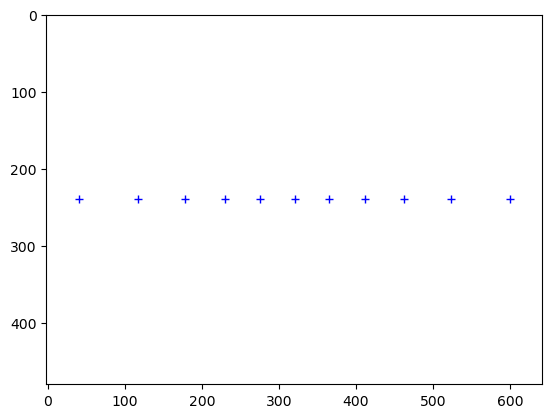

In [ ]:
plt.axis("equal")
plt.xlim((0,640))
plt.ylim((0,480))
plt.gca().invert_yaxis()

Points =[]
for i in range(1,20):
    theta = i*3.14/20
    Points.append([np.cos(theta),0.0,np.sin(theta),0])
    
Points = np.array(Points).T

Images = P@Points
plt.plot(Images[0,:]/Images[2,:],Images[1,:]/Images[2,:], "b+")

# Problema 4

El rover Perseverance se ha desplegado en Marte en 2020 para explorar el planeta. Es
equipado con varias cámaras, y una de ellas (la MastCamZ) se describe en esta página:
https://mars.nasa.gov/mars2020/spacecraft/instruments/mastcam-z/for-scientists/

¿Usa tecnología CCD o CMOS?


Sol: Utiliza tecnología CCD

¿Cómo emite la cámara MastcamZ imágenes en color?

Sol:Como se menciona en la pregunta anterior la cámara utiliza tecnología CCD y además se apoya de un filtro RGB de patrón de Bayer para poder capturar las imágenes a color.  

Calcule el tamaño del sensor en función del FOV máximo informado y la distancia focal mínima.

Sol:Según el documento el FOV máximo informado esde $23° \times 18°$. El FOV anterior se alcanza cuando tenemos la mínima distancia focal que ene ste caso es de $28mm$. 

Recordemos que la distancia focal es la distancia que existe entre el sensor y el lente. Consideremos un ángulo de visión $\alpha$, que es el ángulo que alcanza a captar el lente. Con base en este ángulo, el tamaño del sensor debe ser,

$$
2\times (Focal~lenght) \times tan \frac{\alpha}{2}
$$

Usando esta relación para valores de $\alpha$ igual a $23°$ y $18°$ obtenemos que las dimensiones del sensor deben $11.39mm \times 8.87 mm$. 


Deduce el tamaño físico del pixel

Sol: Debido a que la resolución del sensor utilizado es de $1600\times 1200$, tenemos que las dimensiones físicas de un pixel serán de $0.0071 mm \times 0.0073 mm$. Convirtiendo la escala de estos valores, la dimensión de un pixel será de $7.1 \mu m \times 7.3 \mu m$

Comprueba que, para una escena situada a 2 m, un píxel correspondería a un objeto de 0,15 mm de tamaño. ¿Para qué valor de la distancia focal sucedería esto?

Sol: Con respecto al centro óptico, tenemos que los ángulos de visión con respecto a lo que se ve en el mundo real y con lo que refleja hacia el sensor forman triángulos semejantes. Vamos a tomar la dimensión la cual tiene 1200 pixeles del sensor. Notemos que si el tamaño de un pixel en la escena es de $0.15mm$ entonces el tamaño total de la escena sería de $1200\times 0.15mm=180mm$. Además el tamaño del sensor sobre esta dimensión es de $8.87mm$, entonces utilizando las semejanzas entre los triángulos:

$$
\frac{2000mm}{180mm} = \frac{FL}{8.87mm}
$$

Por lo que $FL= 98.55mm$. Haciendo el mismo procedimiento sobre la otra dimesión, donde el sensor tiene 1600 pixeles llegamos a la ecuación:

$$
\frac{2000mm}{1600\times 0.15} = \frac{FL}{11.39}
$$

y así $FL= 94.91mm$. En conclusión, a dos metros de la cámara y una lonfitud focal entre $94.91mm$ y $98.55mm$ un pixel correspondería a un objeto de $0.15mm$.

Suponiendo que el eje óptico está centrado en el sensor y que $\theta = \pi/2$, determina la
matriz de parámetros intrínsecos K de la cámara MastCamZ (en su configuración de mínima focal
longitud).

Sol:A partir de los problemas anteriores obtuvimos que la dimensión de los pixeles es de $7.1 \mu m \times 7.3 \mu m$. Supongamos que la cámara se encuentra a una distancia focal mínima de 28mm. Entonces,

$$
\alpha_u = 3943.66
$$

$$
\alpha_v = 3835.62
$$

Dado que el ángulo es de $\pi/2$ obtenemos:

$$
u_0 = 800px
$$

$$
v_0 = 600 px
$$